# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

# Chapter 6: Prediction 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Predictive models
### Forecasting
#### Example of using forecasting to predict future

In [2]:
msu_df = pd.read_csv('MSU applications.csv')
msu_df.set_index('Year',drop=True,inplace=True)

In [3]:
application_df = pd.DataFrame(msu_df.N_Applications)

In [4]:
application_df.transpose()

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
N_Applications,5778,5140,6141,7429,7839,9300,9864,10449,11117,10766,12701,13930,13817,17363,18269,16127


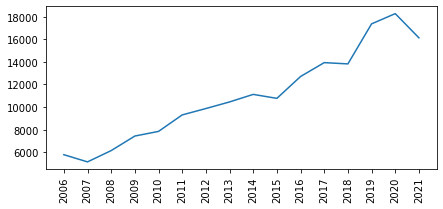

In [5]:
plt.figure(figsize=(7,3))
plt.plot(application_df)
plt.xticks(application_df.index,rotation=90)
plt.show()

In [6]:
application_df.loc[2017:2021].mean()

N_Applications    15901.2
dtype: float64

In [7]:
average_df = pd.DataFrame(application_df.loc[2017:2021])
average_df['N_Applications'] = 15901.2
average_df.loc[2022] = 15901.2

In [8]:
predict_df = pd.DataFrame(application_df.loc[2021]).transpose()
predict_df.loc[2022] = 15901.2
predict_df

,N_Applications
2021,16127.0
2022,15901.2


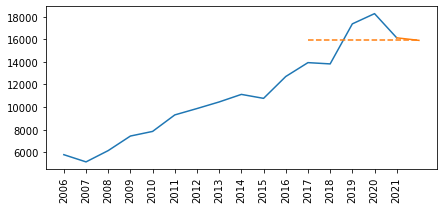

In [9]:
plt.figure(figsize=(7,3))
plt.plot(application_df)
plt.plot(average_df,linestyle='--',c='C1')
plt.plot(predict_df,c='C1')
plt.xticks(application_df.index,rotation=90)
plt.show()

## Regression Analysis
### Example of designing regression analysis to predict future values
## Linear Regression

In [10]:
import pandas as pd
msu_df = pd.read_csv('MSU applications.csv')
msu_df.set_index('Year',drop=True,inplace=True)
msu_df

,P_Football_Performance,SMAn2,N_Applications
Year,,,
2006,0.273,5778.0,5778
2007,0.273,5778.0,5140
2008,0.250,5459.0,6141
2009,0.615,5640.5,7429
2010,0.333,6785.0,7839
2011,0.417,7634.0,9300
2012,0.692,8569.5,9864
2013,0.538,9582.0,10449
2014,0.615,10156.5,11117


In [ ]:
conda install -c intel scikit-learn

In [11]:
from sklearn.linear_model import LinearRegression

X = ['P_Football_Performance','SMAn2']
y = 'N_Applications'

data_X = msu_df[X]
data_y = msu_df[y]

lm = LinearRegression()
lm.fit(data_X, data_y)

print('intercept (b0) ', lm.intercept_)
coef_names = ['b1','b2']
print(pd.DataFrame({'Predictor': data_X.columns,
                    'coefficient Name':coef_names, 
                    'coefficient Value': lm.coef_}))

intercept (b0)  -890.7106225983407
                Predictor coefficient Name  coefficient Value
0  P_Football_Performance               b1        5544.961933
1                   SMAn2               b2           0.907032


#### How to use the trained equation for prediction

In [12]:
newData = pd.DataFrame({'P_Football_Performance':0.364,'SMAn2':17198},
                       index=[2022])
newData

,P_Football_Performance,SMAn2
2022,0.364,17198


In [13]:
lm.predict(newData)

array([16726.78787061])

## Multi-Layered Perceptron (MLP)

In [14]:
from sklearn.neural_network import MLPRegressor

X = ['P_Football_Performance','SMAn2']
y = 'N_Applications'

data_X = msu_df[X]
data_y = msu_df[y]

mlp = MLPRegressor(hidden_layer_sizes=6, max_iter=10000)
mlp.fit(data_X, data_y)

mlp.predict(newData)

array([18823.23282676])